<a href="https://colab.research.google.com/github/amarie-51/projekt_NLP/blob/main/hate_speech2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ** TASK 1**




Przetwarzanie wstępne 

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import re
import tensorflow as tf

nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Tworzymy dataframe z treścią tweeta oraz oceną czy jest hejtem

In [2]:
tags_poprawne=pd.read_csv('/content/training_set_clean_only_tags.txt', header = None)
tweets=open('/content/training_set_clean_only_text.txt')
table_of_tweets=[]
for line in tweets.readlines():
  table_of_tweets.append(line)

tags_poprawne.columns=["Czy hate"]
tweets=pd.DataFrame(table_of_tweets)
tweets.columns=["Tweet"]
df_tweets=pd.concat([tweets,tags_poprawne],axis=1)



In [3]:
df_tweets.loc[:,"Tweet"] = df_tweets.Tweet.apply(lambda x : str.lower(x))
df_tweets.loc[:,"Tweet"] = df_tweets.Tweet.apply(lambda x : " ".join(re.findall('[\w]+',x)))

Dodać txt ze stop_words, które trzeba usunąć

Usuwam stop_words

In [5]:
with open("/content/stop_words.txt", "r") as stop_words:
	lines = stop_words.read().splitlines()


stop_words=lines
def remove_stopWords(s):
    '''For removing stop words
    '''
    s = ' '.join(word for word in s.split() if word not in stop_words)
    return s

df_tweets.loc[:,"Tweet"] = df_tweets.Tweet.apply(lambda x: remove_stopWords(x))


In [6]:
df_tweets["Tokeny"]=df_tweets["Tweet"]
df_tweets['Tokeny'] = df_tweets.apply(lambda row: nltk.word_tokenize(row['Tweet']), axis=1)
print(df_tweets.columns)


Index(['Tweet', 'Czy hate', 'Tokeny'], dtype='object')


Wizualizacja słów,
 w razie gdyby pojawiły się jeszcze słowa, które warto usunąć np. xd, dodaje do stop_words





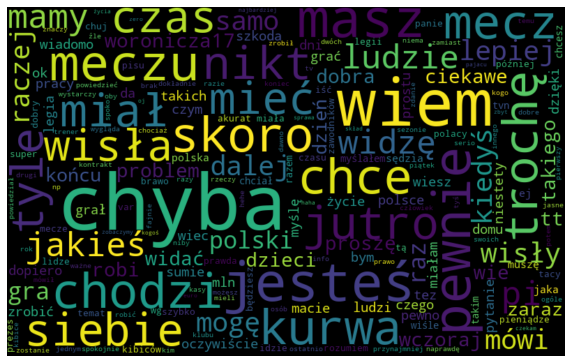

In [7]:
def rozklad_slow(data):
  all_words = ' '.join([text for text in data ])
  wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
  plt.figure(figsize=(10, 7))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()
rozklad_slow(df_tweets["Tweet"])

sprawdzamy najczestsze słowa w tweetach pozytywnych oraz później w negatywnych

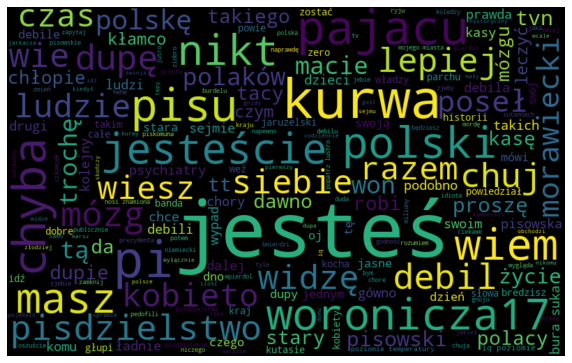

<bound method NDFrame.head of 0                brudziński jesteś kłamcą marnym kutasem
1                  skończmy kurwa wersalem j ej szczujni
2      woronicza 17 poseł halicki oburzony bolka napr...
3      narazie masz przywidzenia zmienia faktu czas j...
4                          nikt rozsiewał takiego smrodu
                             ...                        
846               premier psl wyprzedawali polską ziemię
847    proponuję pozbawić obywatelstwa polskiego obją...
848         zwycięstwa kogo czego bandy schizoli rozumem
849     dorównam głupocie zapowiedział zasrany obowiązek
850                mentalnościowo murzyn kwadratu czarny
Name: Tweet, Length: 3404, dtype: object>


In [11]:
df_negatywne=df_tweets.loc[df_tweets["Czy hate"]==1].reset_index()

rozklad_slow(df_negatywne['Tweet'])


df_negatywne=pd.concat([df_negatywne,df_negatywne,df_negatywne,df_negatywne]) #robię trochę manualny oversampling, tworze nowy dataframe z podwojana liczba tweetów negatywnych
print(df_negatywne["Tweet"].head)

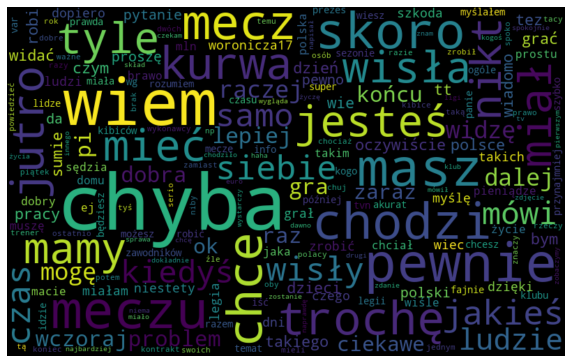

<bound method NDFrame.head of 0        faworytem tytułu cracovia zobaczymy typ sprawdzi
1                             brawo daria kibic dobre złe
2       super polski premier składa kwiaty grobach kol...
3                                        innej drogi mamy
4               odrzut natychmiastowy kwaśna mina problem
                              ...                        
9185                                   zagrasz wiedziałem
9186    var miał poprawić jakości sędziowania efekt ko...
9187                     szanowany kolega ładnie pożegnał
9188         bić zwyciezca ligi wojewódzkiej gra barazach
9189                      wróżbita maciej mówi zrozumiemy
Name: Tweet, Length: 9190, dtype: object>


In [12]:
df_pozytywne=df_tweets.loc[df_tweets["Czy hate"]==0].reset_index()

rozklad_slow(df_pozytywne["Tweet"])
print(df_pozytywne["Tweet"].head)
df_random_pozytywne=df_pozytywne.sample(n=6000)#do nowego dataframe, downsampling tweetów negatywnych

In [13]:
df_tweets=pd.concat([df_random_pozytywne, df_negatywne])

print(df_tweets["Czy hate"].head)


<bound method NDFrame.head of 5011    0
4416    0
7601    0
8699    0
6681    0
       ..
846     1
847     1
848     1
849     1
850     1
Name: Czy hate, Length: 9404, dtype: int64>


najpopularniejsze słowa wg rodzaju tweeta

In [ ]:
from collections import Counter
from collections import Counter
import matplotlib.pyplot as plt

def get_most_common(df,top=20):
  words=Counter(" ".join(df).split()).most_common(top)
  print(f'Found {len(words)} words.')
  most_common = Counter(words).most_common(top)
  labels = []
  values = []
  for label, val in most_common:
    labels.append(label)
    values.append(val)
  return values, labels

def plot_most_common(df, top=20, title=''):
  values, labels = get_most_common(df, top)
  x = range(len(values))

  plt.figure(figsize=(15, 5))
  plt.bar(x, values)
  plt.xticks(x, labels, rotation=90)
  plt.title(title)
  plt.show()

plot_most_common(tweets_train, top=30, title='Top 30 most common words in train set')

# lemmatyzacja

In [14]:
!pip install --upgrade spacy

     |████████████████████████████████| 12.8MB 312kB/s 
     |████████████████████████████████| 460kB 39.8MB/s 
     |████████████████████████████████| 624kB 37.5MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 9.1MB 41.1MB/s 
     |████████████████████████████████| 122kB 45.3MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107107 sha256=b373e3675b723ed48046da234172604b0b713a83026dfd50c468c2075ad4e192
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found e

In [15]:
!sudo python -m spacy download pl_core_news_sm

2021-06-16 08:40:27.001540: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 58.2MB 59kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_sm')


In [16]:
import spacy
from spacy.lang.pl.stop_words import STOP_WORDS as stop_words_spacy

nlp=spacy.load('pl_core_news_sm')

In [17]:
def lemmatize(comments: list, nlp: spacy) -> list:
  
  def is_redundant(token):
    return any([token.is_punct, token.is_stop, token.is_space])

  return [' '.join([token.lemma_ for token in nlp(comment) if not is_redundant(token)]) for comment in comments]

podział zbioru tweetów na dwa datasety

In [19]:
from sklearn.model_selection import train_test_split
tweets = df_tweets['Tweet'].values
label=df_tweets['Czy hate'].values

tweets_train, tweets_test, label_train, label_test = train_test_split(tweets, label, test_size=0.2, shuffle=True)


oversampling, downsampling

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


# lematyzacja wytrenowanego modelu 
lematyzacja poprawiła recall i f1-score

In [20]:
tweets_test=lemmatize(tweets_test, nlp)
tweets_train = lemmatize(tweets_train, nlp)

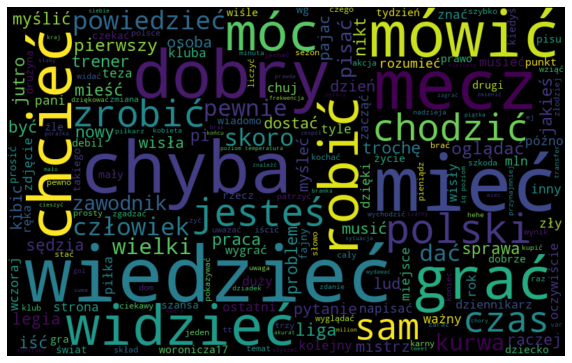

In [21]:
rozklad_slow(tweets_train) #rozkład słów poddanych lematyzacji

Wektoryzacja tekstu

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(tweets_train)

X_train = vectorizer.transform(tweets_train)
X_test  = vectorizer.transform(tweets_test)
print(X_train.shape,X_test.shape)


(7523, 11424) (1881, 11424)


regresja liniowa

In [23]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, label_train)
score = classifier.score(X_test, label_test)

print("Accuracy:", score)

Accuracy: 0.9553429027113237


# Sieci neuronowe 

In [25]:
import numpy as np
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Embedding,LSTM
import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

In [26]:

model= Sequential([
                   Dense(units=16,activation="relu"),
                   Dropout(0.5),
                   Dense(units=8,activation="relu"),
                   Dense(units=1, activation="sigmoid")
                  
])
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])


In [27]:
model.build(X_train.shape)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (7523, 16)                182800    
_________________________________________________________________
module_wrapper_1 (ModuleWrap (7523, 16)                0         
_________________________________________________________________
module_wrapper_2 (ModuleWrap (7523, 8)                 136       
_________________________________________________________________
module_wrapper_3 (ModuleWrap (7523, 1)                 9         
Total params: 182,945
Trainable params: 182,945
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:449: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/module_wrapper/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/module_wrapper/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 16), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/module_wrapper/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


941/941 [==============================] - 29s 6ms/step - loss: 0.6073 - accuracy: 0.6681 - val_loss: 0.2895 - val_accuracy: 0.8915
Epoch 2/10
941/941 [==============================] - 5s 5ms/step - loss: 0.2230 - accuracy: 0.9259 - val_loss: 0.1510 - val_accuracy: 0.9468
Epoch 3/10
941/941 [==============================] - 4s 5ms/step - loss: 0.0983 - accuracy: 0.9723 - val_loss: 0.1104 - val_accuracy: 0.9623
Epoch 4/10
941/941 [==============================] - 4s 5ms/step - loss: 0.0515 - accuracy: 0.9860 - val_loss: 0.0965 - val_accuracy: 0.9676
Epoch 5/10
941/941 [==============================] - 4s 4ms/step - loss: 0.0384 - accuracy: 0.9909 - val_loss: 0.0936 - val_accuracy: 0.9761
Epoch 6/10
941/941 [==============================] - 4s 4ms/step - loss: 0.0290 - accuracy: 0.9920 - val_loss: 0.1026 - val_accuracy: 0.9676
Epoch 7/10
941/941 [==============================] - 4s 4ms/step - loss: 0.0311 - accuracy: 0.9904 - val_loss: 0.1047 - val_accuracy: 0.9708
Epoch 8/10
941/9

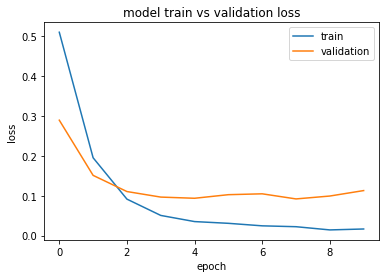

In [28]:
history= model.fit(X_train,label_train, validation_data=(X_test,label_test), batch_size=8, epochs=10)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
tf.keras.backend.clear_session() #wyczysczenie wytrenowanego modelu

In [29]:
model.evaluate(X_test,label_test)


59/59 [==============================] - 0s 2ms/step - loss: 0.1129 - accuracy: 0.9718


[0.1128661036491394, 0.971823513507843]

In [30]:
loss, accuracy = model.evaluate(X_train, label_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, label_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.9991
Testing Accuracy:  0.9718


Wykres przedstawiajacy  loss oraz accuracy

In [34]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


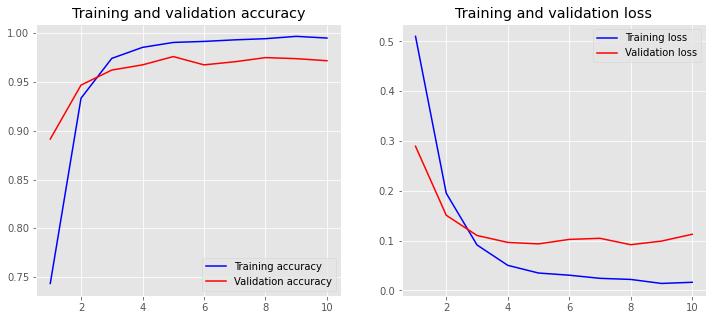

In [35]:
plot_history(history) 

Sprawdzamy model

In [31]:
y_pred=model.predict(X_test)

y_pred=np.round(y_pred)


In [32]:
print(y_pred[:10])
print(label_test[:10])

[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]
[0 1 0 0 0 1 0 0 0 0]


Ponieważ zbiór danych nie jest równy, dlatego accuracy nie jest dobrym wyznacznikiem modelu.
Wartość recall oraz f1-score są niskie, co świadczy o słabym działaniu modelu.
Większość tweetów to sa jednak tweety neutralne.
Tylko 30% to tweety negatywne

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(label_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1193
           1       0.93      0.99      0.96       688

    accuracy                           0.97      1881
   macro avg       0.96      0.98      0.97      1881
weighted avg       0.97      0.97      0.97      1881

